In [128]:
import numpy as np
import matplotlib.pyplot as plt

def extract_top_signals(signal, fs, t_max, num_signals=3,):
    # Generate a more complex sample signal
    fs  # Sampling frequency
    t = np.arange(0, t_max, 1/fs)  # Time vector

    # Perform FFT
    fft_result = np.fft.fft(signal)
    freq = np.fft.fftfreq(len(signal), 1/fs)

    # Filter out negative frequencies
    positive_freq_indices = np.where(freq > 0)
    fft_result = fft_result[positive_freq_indices]
    freq = freq[positive_freq_indices]

    # Get the top 3 frequencies
    top_indices = np.argsort(np.abs(fft_result))[::-1][:3]

    # Print amplitude, phase, and frequency of the top 3 frequencies
    amplitude = np.zeros(3)
    frequency = np.zeros(3)
    phase = np.zeros(3)

    for i, i_fft in enumerate(top_indices):
        amplitude[i] = np.abs(fft_result[i_fft])*2/fs
        phase[i] = np.angle(fft_result[i_fft])
        frequency[i] = np.abs(freq[i_fft])
        print(f"Frequency {i} - Amplitude: {amplitude[i]}, Phase: {phase[i]}, Frequency: {frequency[i]}")

    return amplitude, frequency, phase

def generate_signal(t, amplitude, frequency, phase):
    new_signal = 0 

    for i in range(len(amplitude)):
        new_signal += amplitude[i] * np.cos(2 * np.pi * frequency[i] * t + phase[i])
    
    return new_signal


Frequency 0 - Amplitude: 2.0, Phase: -1.570796326794897, Frequency: 5.0
Frequency 1 - Amplitude: 0.4999999999999998, Phase: -1.5707963267948928, Frequency: 50.0
Frequency 2 - Amplitude: 0.19999999999999973, Phase: -1.5707963267949152, Frequency: 150.0


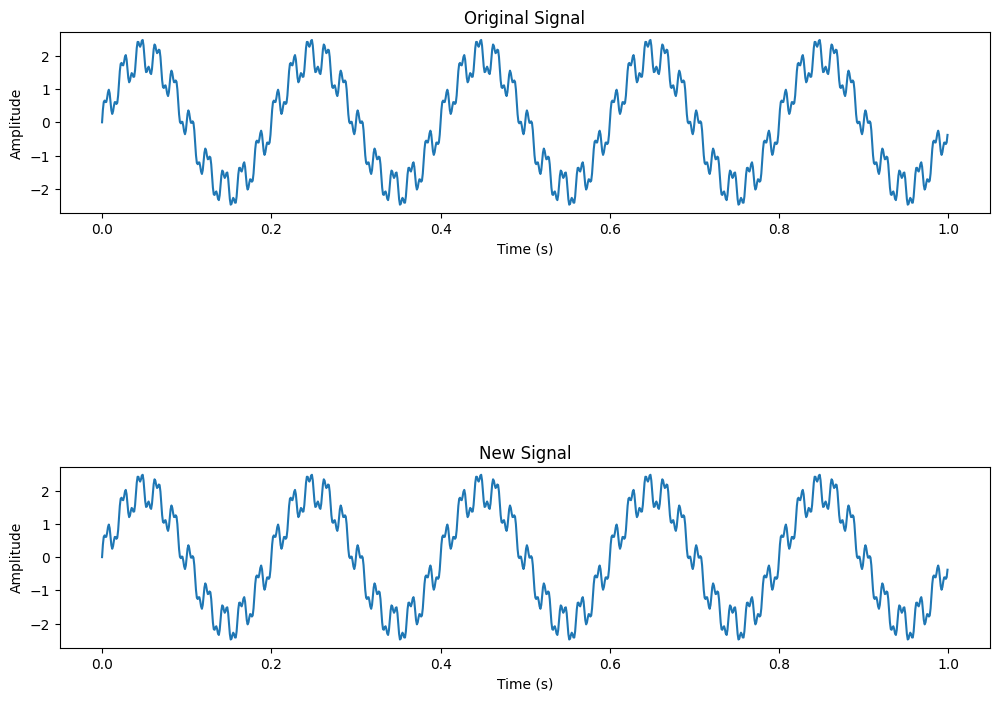

In [135]:
# Generate a more complex sample signal
fs = 1000 # Sampling frequency
t_max = 1
t = np.arange(0, t_max, 1/fs)  # Time vector
f1, f2, f3 = 5, 50, 150  # Frequencies of the signal
signal = 2 * np.sin(2 * np.pi * f1 * t) + 0.5 * np.sin(2 * np.pi * f2 * t) + 0.2 * np.sin(2 * np.pi * f3 * t)

amplitude, frequency, phase = extract_top_signals(signal, 1000, t_max)
new_signal = generate_signal(t, amplitude, frequency, phase)

# Plot the original signal, its FFT, and the reconstructed signal
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(t, signal)
plt.title('Original Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')


plt.subplot(3, 1, 3)
plt.plot(t, new_signal)
plt.title('New Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.show()


time
shot
frame_path
tracked_ids
tracked_bbox
tid
bbox
tracked_time
appe
loca
pose
center
scale
size
img_path
img_name
class_name
conf
annotations
smpl
camera
camera_bbox
3d_joints
2d_joints
mask
extra_data


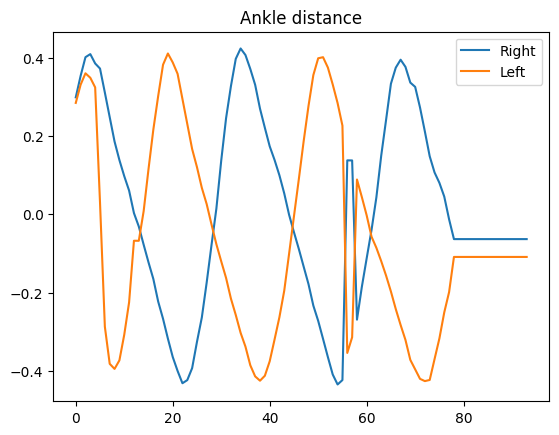

In [130]:
import joblib
import os
import matplotlib.pyplot as plt


data_dir = "./pickles/"
file = "demo_girl.pkl"
girl = joblib.load(data_dir + file)
girl.keys()

for key in girl['outputs//_DEMO/girl/img\\000085.jpg'].keys():
    print(key)

JOINT_NAMES = [
# 25 OpenPose joints (in the order provided by OpenPose)
'Nose',
'Neck',
'RShoulder',
'RElbow',
'RWrist',
'LShoulder',
'LElbow',
'LWrist',
'MidHip',
'RHip',
'RKnee',
'RAnkle',
'LHip',
'LKnee',
'LAnkle',
'REye',
'LEye',
'REar',
'LEar',
'LBigToe',
'LSmallToe',
'LHeel',
'RBigToe',
'RSmallToe',
'RHeel',
# 24 Ground Truth joints (superset of joints from different datasets)
'Right Ankle',
'Right Knee',
'Right Hip',
'Left Hip',
'Left Knee',
'Left Ankle',
'Right Wrist',
'Right Elbow',
'Right Shoulder',
'Left Shoulder',
'Left Elbow',
'Left Wrist',
'Neck (LSP)',
'Top of Head (LSP)',
'Pelvis (MPII)',
'Thorax (MPII)',
'Spine (H36M)',
'Jaw (H36M)',
'Head (H36M)',
'Nose',
'Left Eye',
'Right Eye',
'Left Ear',
'Right Ear'
]

#using first 44
JOINT_NAMES = JOINT_NAMES[:44]

#creating dict
joint_dict = {}
for i in range(0, len(JOINT_NAMES)):
    joint_dict[i] = JOINT_NAMES[i]

feature = '3d_joints'

#dimension in relation to the root (0-forward/backward(forward-positive), 1-down/up(down-positive), 2-left/right(left-positive))
dimension = [0]

#just find the right indexes in joint_dict
rankle = 11
lankle = 14
values_r = []
values_l = []

for frame in girl.values():
    if len(frame[feature]) > 0:
        values_r.append(frame[feature][0][rankle][dimension])
        values_l.append(frame[feature][0][lankle][dimension])

plt.plot(range(len(values_r)), values_r)
plt.plot(range(len(values_l)), values_l)
plt.title('Ankle distance')
plt.legend(('Right', 'Left'))
plt.show()


In [131]:
print("Right: ")
new_signal_r, amplitude_r, frequency_r, phase_r = extract_top_signals(values_r, 1/24)

print("\nLeft: ")
new_signal_l, amplitude_l, frequency_l, phase_l = extract_top_signals(values_l, 1/24)

plt.plot(range(len(new_signal_r)), new_signal_r)
plt.plot(range(len(new_signal_l)), new_signal_l)
plt.title('Ankle distance')
plt.legend(('Right', 'Left'))
plt.show()


Right: 


TypeError: extract_top_signals() missing 1 required positional argument: 't_max'